# **Perkenalan**
Team :
* Ida Nur Laela (PYTN-KS11-013)
* Satrio Muhammad F R (PYTN-KS11-016)
* Rizka Latifatul H (PYTN-KS11-018)

Python for Data Science - Studi Independen - Kampus Merdeka

## **Latar Belakang**
Project ini berisikan tentang penerapan LinearRegression pada dataset Uber & Lyft. Dataset yang digunakan terdiri dari 693071 observasi/baris dan 57 fitur/kolom tentang data harga perjalanan menggunakan taksi Uber & Lyft. Berdasarkan waktu, penggandaan harga (surge multiplier), jarak, dan keadaan cuaca pada saat itu. LinearRegression digunakan untuk memprediksi harga taksi berdasarkan waktu, jarak, dan keadaan cuaca.

## **Objektif**
Final Project 1 ini dibuat guna mengevaluasi konsep Regression sebagai berikut:

● Mampu memahami konsep regression dengan Linear Regression

● Mampu mempersiapkan data untuk digunakan dalam model Linear Regression

● Mampu mengimplementasikan Linear Regression untuk membuat prediksi

# **Import Pustaka**

In [144]:
# Import library preprocessing dan visualisasi
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import library modelling
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import pickle

%matplotlib inline
pd.options.mode.chained_assignment = None
import warnings
warnings.filterwarnings('ignore')

# **Data Loading**

Bagian ini berisi proses data loading yang kemudian dilanjutkan dengan explorasi data secara sederhana.

## Memasukkan Dataset, dataset yang di pakai pada program ini ialah dataset uber dan lyft, lalu menampilkan data teratas dan terbawah.

In [56]:
df = pd.read_csv('rideshare_kaggle.csv')
df

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


## Menampilkan nama kolom apa saja yang terdapat di dalam dataset

In [57]:
df.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

## Menampilkan informasi tentang kolom, baris dan tipe data yang berada di dalam dataset

In [58]:
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


Dataset ini memiliki 57 atribut. Atribut dalam dataset ini antara lain :

1. id : unique identifier for each column
2. timestamp : unix timestamp
3. hour : hour of the day
4. day : day of the week
5. month : month in a year
6. datetime : date value
7. Timezone
8. source : initial source of the ride
9. destination : destination of the ride
10. cab_type : the type of cab
11. . . . dan lainnya

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

Dari hasil di atas merupakan seluruh variabel yang terdapat dari dataset rideshare yang berjumlah sebanyak 57 variabel, dan memiliki 3 jenis tipe data yang terdiri dari object, float, dan integer

## Menampilkan informasi tentang jumlah baris dan kolom yang berada di dalam dataset ini

In [60]:
df.shape

(693071, 57)

Dataframe yang digunakan memiliki total observasi sebanyak 693071 baris dan total variabel 57 kolom

## Menampilkan informasi tentang statistik deskriptif pada masing masing atribut yang bertipe numerik

In [61]:
df.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,...,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,...,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,...,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,...,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,...,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,...,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,...,0.091600,1.544807e+09,38.880000,1.544789e+09,46.910000,1.544814e+09,35.710000,1.544789e+09,44.120000,1.544818e+09
max,1.545161e+09,23.000000,30.000000,12.000000,97.500000,7.860000,3.000000,42.366100,-71.033000,57.220000,...,0.145900,1.545152e+09,43.100000,1.545192e+09,57.870000,1.545109e+09,40.050000,1.545134e+09,57.200000,1.545109e+09


Hasil di atas menunjukkan statistik deskriptif dari seluruh variabel dataframe rideshare.

## Menampilkan dan mengecek informasi tentang data yang terduplikasi

In [62]:
df.duplicated().sum()

0

Setelah di cek ternyata hasilnya menampilkan value 0 berarti tidak ada data yang terduplikasi

## Mengecek dan menampilkan informasi tentang missing value pada dataset ini

In [63]:
df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

Setelah dilakukan pengecekan missing value pada dataset ini, ternyata terdapat missing value pada dataset ini tepatnya pada kolom 'Price'. Pada kolom price terdapat missing value berjumlah 55095. Dikarenakan terdapat missing value pada kolom price, maka kita akan melakukan drop missing value agar untuk melakukan modelling nanti nilai akurasinya lebih akurat.

# **EDA : Explorasi Data Analysis**

Selanjutnya kita akan menampilkan data kembali. Pada bagian ini berisi explorasi data yang lebih mendalam, menggunakan query, grouping, visualisasi sederhana, dan tahap lainnya jika di perlukan.

## Mengecek Variabel Dependent

<AxesSubplot:xlabel='price'>

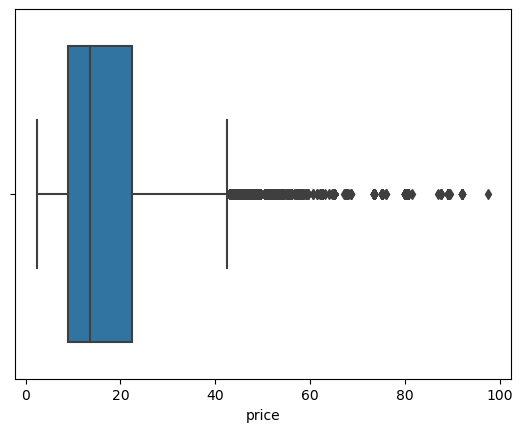

In [60]:
sns.boxplot(df['price'])

Dari boxplot di atas terlihat bahwa terdapat banyak bulatan hitam, artinya data price mengandung banyak outlier. Maka data harus outlier harus dihapus yaitu yang melebihi maksimal threshold atau batas maksimal.

## Mengecek batas max threshold

In [11]:
max_threshold = df['price'].quantile(0.99)
max_threshold

42.5

## Mengahapus data price yang memiliki nilai lebih dari max_threshold atau lebih dari 42.5

In [12]:
out = np.where(df['price']>42.5)
print(out[0])
print(np.count_nonzero(np.where(df['price']>42.5)))

[   706    707    769 ... 692891 692962 693007]
5589


In [13]:
df.drop(out[0], inplace = True)
df.shape

(687482, 57)

<AxesSubplot:xlabel='price'>

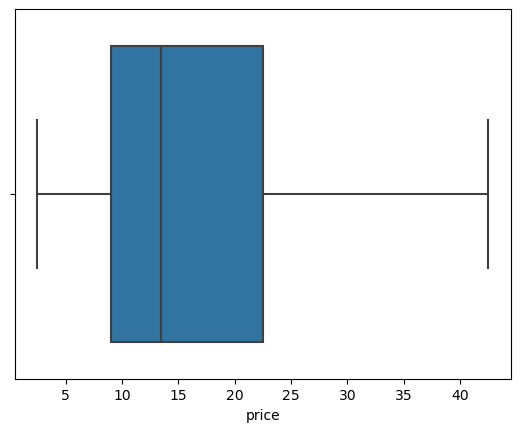

In [14]:
sns.boxplot(df['price'])

Dari boxplot diatas variabel dependent price sudah tidak memiliki outlier.

## Melihat perbandingan persebaran dari penggunaan Uber dan Lyft

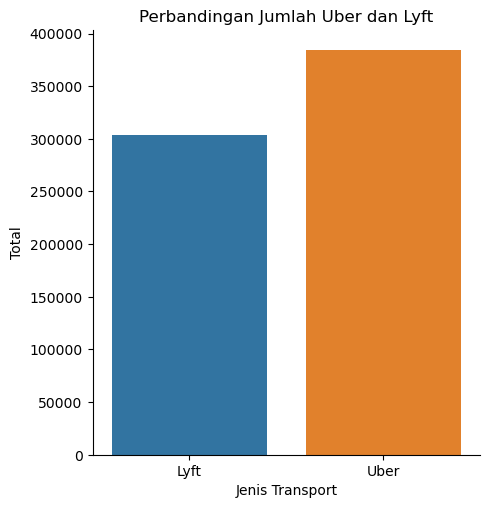

In [15]:
transport = sns.catplot(x='cab_type',data=df,kind='count')
transport.set_axis_labels('Jenis Transport', 'Total')
transport.set(title='Perbandingan Jumlah Uber dan Lyft')
plt.show()

Dari hasil di atas dapat dilihat bahwa perbandingan jumlah data dengan type Uber dan Lyft dengan total perjalanan yang menggunakan kendaraan dari type uber lebih banyak dibandingkan dengan total lyft.

## Melihat persebaran penggunaan Uber dan Lyft dalam 24 jam (sehari)

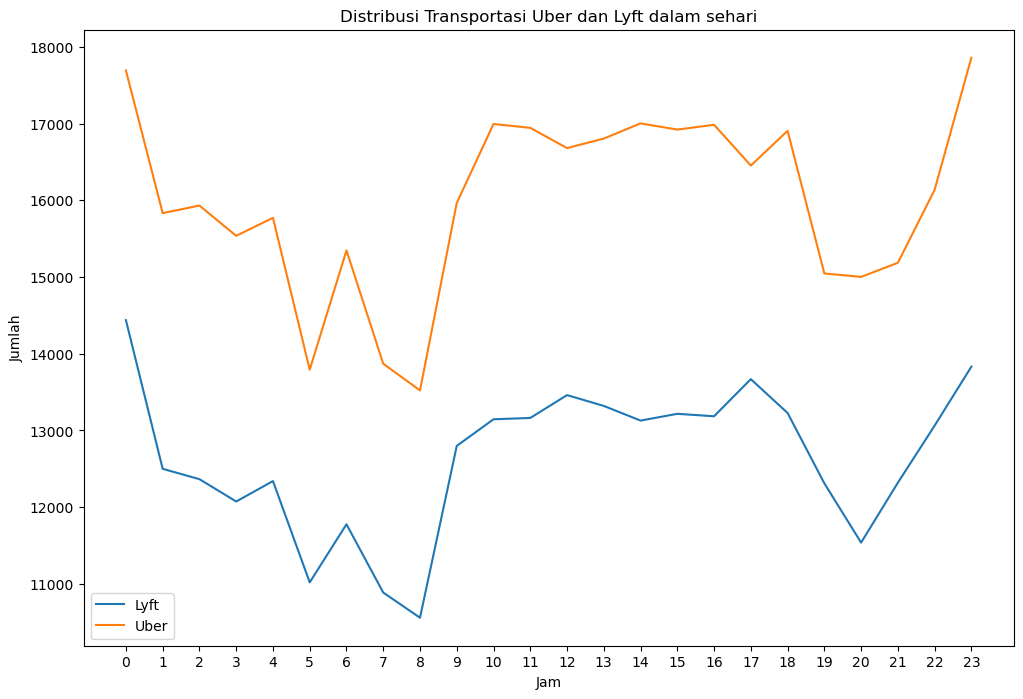

In [16]:
fig, ax = plt.subplots(figsize=(12, 8))

# Menghitung jumlah perjalanan setiap jam untuk Lyft dan Uber
lyft_count = df[df["cab_type"] == "Lyft"].groupby("hour").hour.count()
uber_count = df[df["cab_type"] == "Uber"].groupby("hour").hour.count()

# Plot data menggunakan variabel yang telah dibuat
ax.plot(lyft_count.index, lyft_count, label="Lyft")
ax.plot(uber_count.index, uber_count, label="Uber")

ax.legend()
ax.set(xlabel="Jam", ylabel="Jumlah", title="Distribusi Transportasi Uber dan Lyft dalam sehari")
plt.xticks(range(0, 24, 1))
plt.show()


Dari garfik diatas dapat dilihat perbedaan persebaran penggunaan uber dan lyft yang terjadi dalam sehari masing-masing jenis transportasi mengalami fluktuasi dimana pada jam 08.00 pagi mengalami penurunan dan mengalami penaikan dalam jam 22.00-23.00 atau jam malam.

## Melihat korelasi dari price dan distance

In [64]:
# Melihat isi data kolom jarak dan harga
distance = df[['distance','price']]
distance

,distance,price
0,0.44,5.0
1,0.44,11.0
2,0.44,7.0
3,0.44,26.0
4,0.44,9.0
...,...,...
693066,1.00,13.0
693067,1.00,9.5
693068,1.00,NaN
693069,1.00,27.0


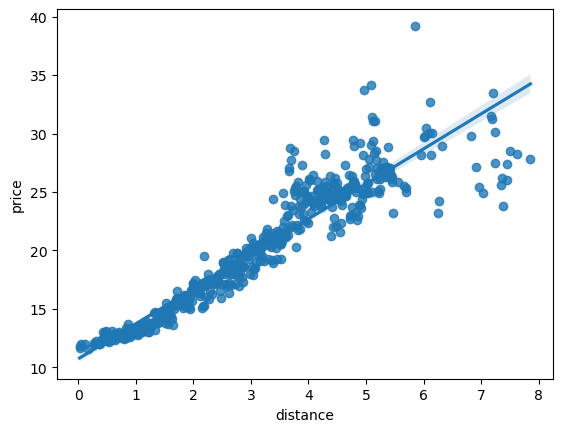

In [65]:
distances = df.groupby('distance')['price'].mean()
sns.regplot(x=distances.index,y=distances,scatter=True)
plt.show()

Dari hasil plot diatas dapat dikatakan bahwa semakin panjang atau jauh jarak maka semakin naik pula harga sehingga jarak dan harga memiliki korelasi positif.

## Membuat Array

Selanjutnya akan dicari korelasi antar variabel (features) yang terdapat pada dataset rideshare. pertama dicari korelasi features temperature, apparentTemperature, temperatureHigh, temperatureLow, apparentTemperatureHigh, apparentTemperatureLow, temperatureMin, temperatureHighTime, temperatureMax, apparentTemperatureMin, dan apparentTemperatureMax, terhadap variabel price yang akan dijadikan sebagai variabel terikat (target).

In [66]:
temp = ['temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh',
            'apparentTemperatureLow','temperatureMin','temperatureHighTime','temperatureMax','apparentTemperatureMin','apparentTemperatureMax','price']

## Membuat dataframe baru

In [67]:
df_temp = df[temp]
df_temp.head()

,temperature,apparentTemperature,temperatureHigh,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,temperatureMin,temperatureHighTime,temperatureMax,apparentTemperatureMin,apparentTemperatureMax,price
0,42.34,37.12,43.68,34.19,37.95,27.39,39.89,1544968800,43.68,33.73,38.07,5.0
1,43.58,37.35,47.30,42.10,43.92,36.20,40.49,1543251600,47.30,36.20,43.92,11.0
2,38.33,32.93,47.55,33.10,44.12,29.11,35.36,1543320000,47.55,31.04,44.12,7.0
3,34.38,29.63,45.03,28.90,38.53,26.20,34.67,1543510800,45.03,30.30,38.53,26.0
4,37.44,30.88,42.18,36.71,35.75,30.29,33.10,1543420800,42.18,29.11,35.75,9.0


## Membuat Heatmap dan melihat korelasi dataframe temp

<AxesSubplot:>

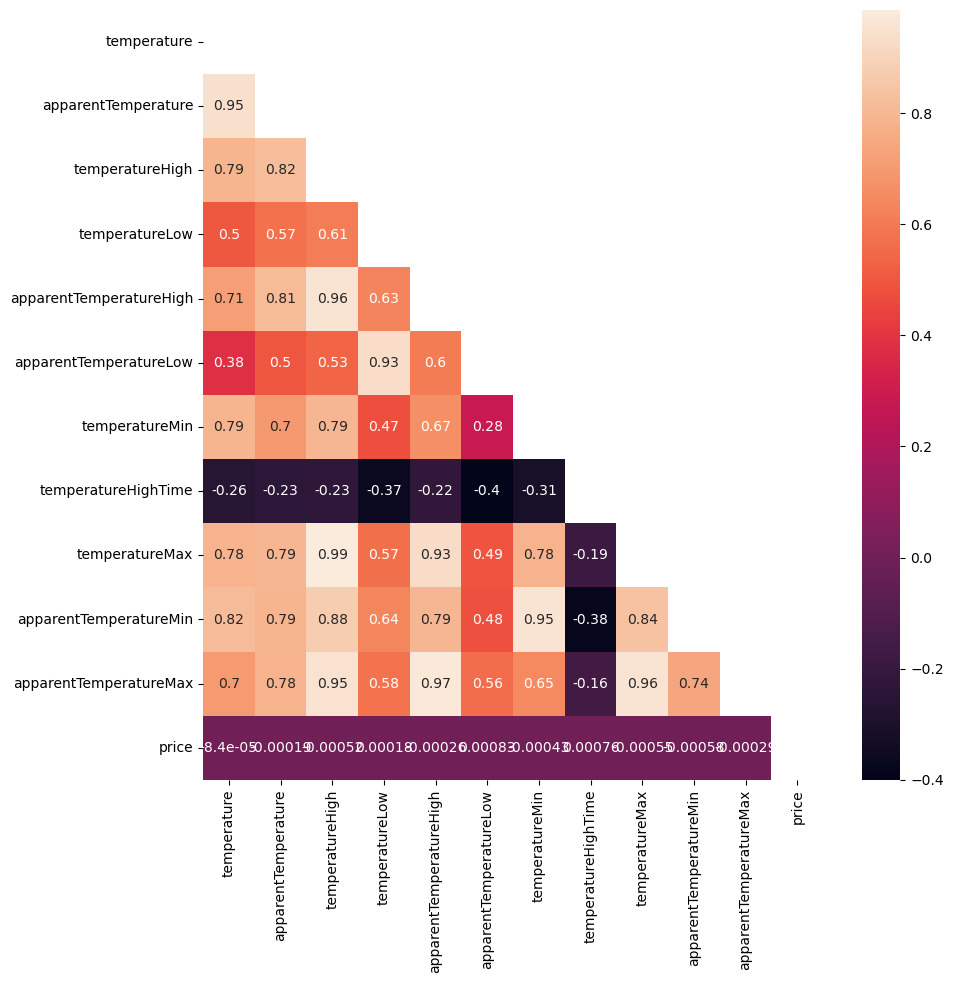

In [68]:
plt.figure(figsize=(10,10))
sns.heatmap(df_temp.corr(),annot=True, mask=np.triu(df_temp.corr()))

Dapat dilihat semua feature temperatur memiliki korelasi yang sangat lemah terhadap target price, maka tahap selanjutnya adalah menghapus semua feature tersebut karena nilai-nilainya hampir 0.

## Membuat dataframe baru untuk diamati korelasinya

In [69]:
climate_column = ['precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'visibility', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'ozone', 'moonPhase',
       'precipIntensityMax','price']
df_clim = df[climate_column]
df_clim.head()

,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,dewPoint,pressure,windBearing,cloudCover,uvIndex,ozone,moonPhase,precipIntensityMax,price
0,0.0000,0.0,0.68,8.66,9.17,10.000,32.70,1021.98,57,0.72,0,303.8,0.30,0.1276,5.0
1,0.1299,1.0,0.94,11.98,11.98,4.786,41.83,1003.97,90,1.00,0,291.1,0.64,0.1300,11.0
2,0.0000,0.0,0.75,7.33,7.33,10.000,31.10,992.28,240,0.03,0,315.7,0.68,0.1064,7.0
3,0.0000,0.0,0.73,5.28,5.28,10.000,26.64,1013.73,310,0.00,0,291.1,0.75,0.0000,26.0
4,0.0000,0.0,0.70,9.14,9.14,10.000,28.61,998.36,303,0.44,0,347.7,0.72,0.0001,9.0


## Membuat heatmap dan melihat korelasi dari climate dan price

<AxesSubplot:>

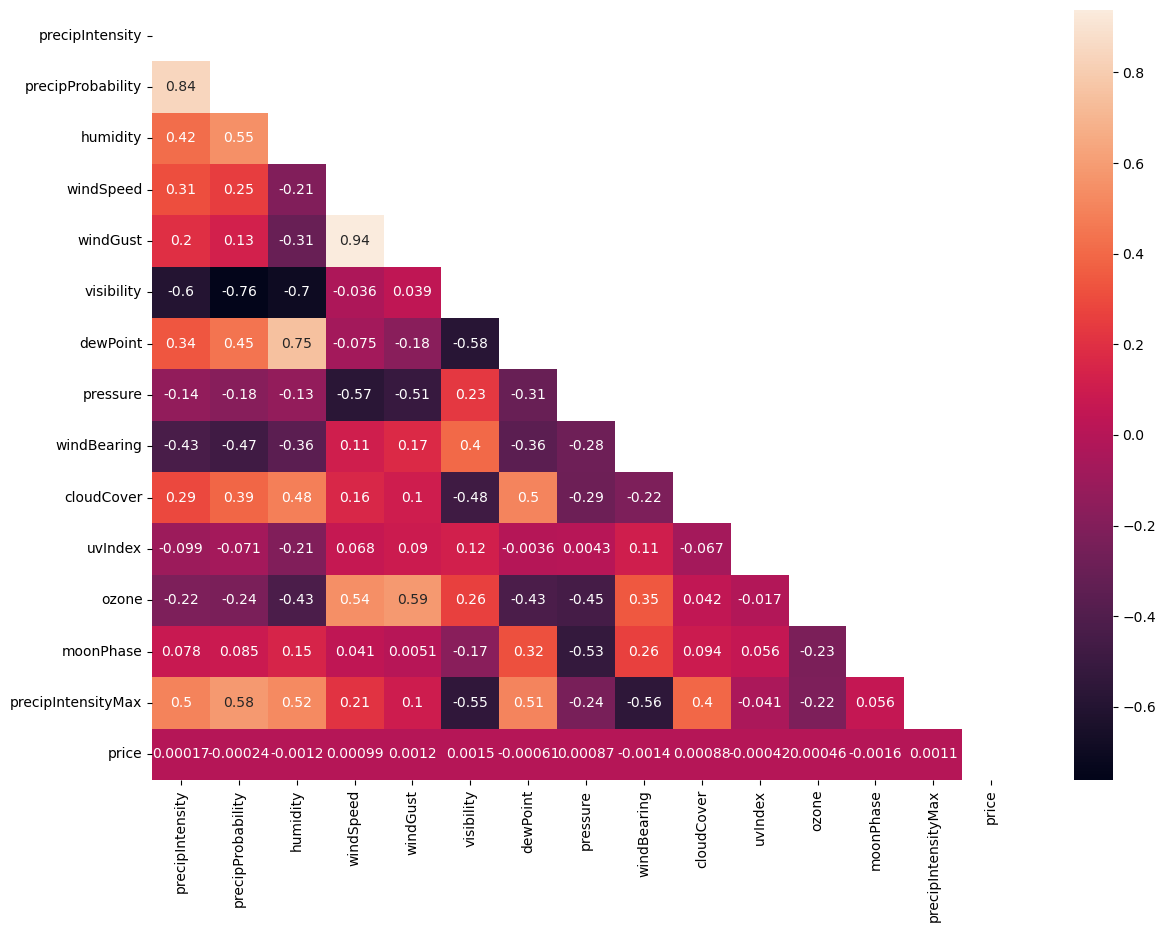

In [70]:
plt.figure(figsize=(14,10))
sns.heatmap(df_clim.corr(),annot=True, mask=np.triu(df_clim.corr()))

Features climate berkorelasi lemah dengan target (price)

## Membuat dataframe baru

Selanjutnya dicari korelasi features Timestamp (hour, day, month) terhadap variabel price yang akan dijadikan sebagai variabel terikat (target).

In [71]:
df_timestamp = df[['hour', 'day', 'month', 'price']]
df_timestamp.head()

,hour,day,month,price
0,9,16,12,5.0
1,2,27,11,11.0
2,1,28,11,7.0
3,4,30,11,26.0
4,3,29,11,9.0


## **Membuat heatmap dan melihat korelasi dari dataframe**

<AxesSubplot:>

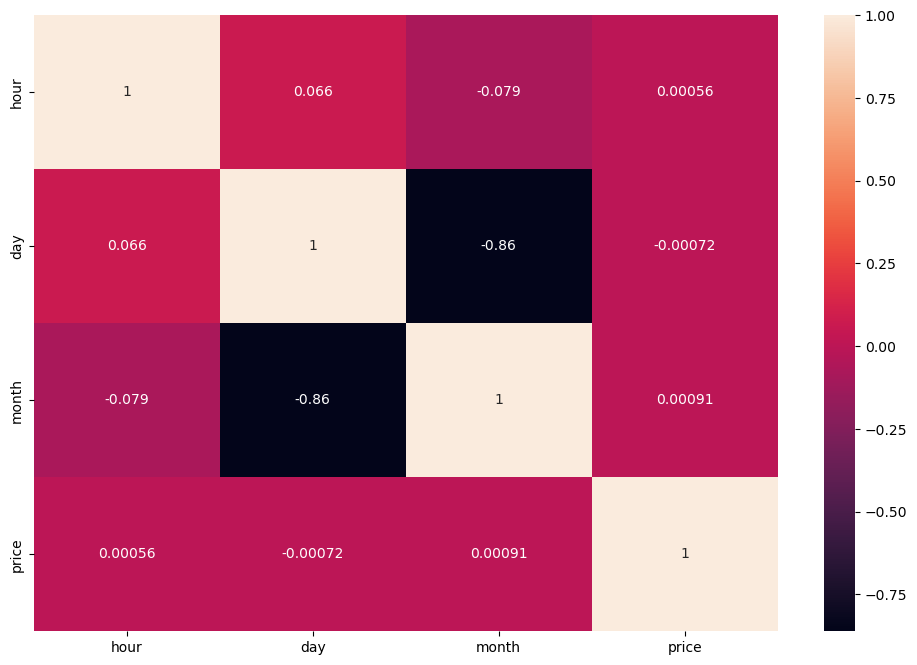

In [72]:
plt.figure(figsize=(12,8))
sns.heatmap(df_timestamp.corr(),annot=True)

Dari hasil heatmap diatas feature hour, day, dan month memiliki korelasi rendah terhadap price.

# **Data Cleaning**

## Menghapus Kolom yang dianggap memiliki korelasi yang rendah

In [73]:
new_df = df.drop(['id', 'product_id', 'timestamp','hour','day','month', 'timezone', 'latitude', 'longitude',
                 'datetime','long_summary','apparentTemperatureHighTime','apparentTemperatureLowTime',
                  'apparentTemperatureLowTime','windGustTime','sunriseTime','sunsetTime','uvIndexTime','temperatureMinTime',
                 'temperatureMaxTime','apparentTemperatureMinTime','temperatureLowTime','apparentTemperatureMaxTime',
                  'temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh',
                  'apparentTemperatureLow','temperatureMin','temperatureHighTime','temperatureMax','apparentTemperatureMin','apparentTemperatureMax',
                  'precipIntensity', 'precipProbability', 'humidity', 'windSpeed', 'windGust', 'visibility', 'dewPoint', 'pressure', 'windBearing',
                  'cloudCover', 'uvIndex', 'ozone', 'moonPhase', 'precipIntensityMax'], axis = 1)

## Melihat ukuran dataframe

In [74]:
new_df.shape

(693071, 10)

Diperoleh dataframe baru dengan ukuran 693071 dengan 9 features dan 1 target

## Menampilkan ukuran dataframe

In [75]:
new_df.head()

,source,destination,cab_type,name,price,distance,surge_multiplier,short_summary,icon,visibility.1
0,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,Mostly Cloudy,partly-cloudy-night,10.000
1,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,Rain,rain,4.786
2,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,Clear,clear-night,10.000
3,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,Clear,clear-night,10.000
4,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,Partly Cloudy,partly-cloudy-night,10.000


# **Data Preprocessing**

## Mengecek missing value

In [76]:
new_df.isnull().sum()

source                  0
destination             0
cab_type                0
name                    0
price               55095
distance                0
surge_multiplier        0
short_summary           0
icon                    0
visibility.1            0
dtype: int64

Setelah dilakukan pengecekan missing value pada dataset ini, ternyata terdapat missing value pada dataset ini tepatnya pada kolom 'Price'. Pada kolom price terdapat missing value berjumlah 55095, ini jumlah yang banyak. Dikarenakan terdapat missing value pada kolom price, maka kita akan melakukan drop missing value agar untuk melakukan modelling nanti nilai akurasinya lebih akurat.

## Menampilkan dataframe

In [77]:
new_df

,source,destination,cab_type,name,price,distance,surge_multiplier,short_summary,icon,visibility.1
0,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,Mostly Cloudy,partly-cloudy-night,10.000
1,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,Rain,rain,4.786
2,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,Clear,clear-night,10.000
3,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,Clear,clear-night,10.000
4,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,Partly Cloudy,partly-cloudy-night,10.000
...,...,...,...,...,...,...,...,...,...,...
693066,West End,North End,Uber,UberXL,13.0,1.00,1.0,Partly Cloudy,partly-cloudy-night,9.785
693067,West End,North End,Uber,UberX,9.5,1.00,1.0,Partly Cloudy,partly-cloudy-night,9.785
693068,West End,North End,Uber,Taxi,NaN,1.00,1.0,Partly Cloudy,partly-cloudy-night,9.785
693069,West End,North End,Uber,Black SUV,27.0,1.00,1.0,Partly Cloudy,partly-cloudy-night,9.785


Berdasarkan data diatas, dapat dilihat bahwa missing value terdapat pada semua atribut taxi. Untuk mengkonfirmasi kembali, tampilkan data yang memiliki name Taxi

## Menghapus Missing Value

In [78]:
new_df.loc[(new_df['name'] == 'Taxi')]

,source,destination,cab_type,name,price,distance,surge_multiplier,short_summary,icon,visibility.1
18,North End,West End,Uber,Taxi,NaN,1.11,1.0,Partly Cloudy,partly-cloudy-day,9.910
31,Beacon Hill,South Station,Uber,Taxi,NaN,2.48,1.0,Overcast,cloudy,7.790
40,North Station,Fenway,Uber,Taxi,NaN,2.94,1.0,Partly Cloudy,partly-cloudy-day,9.772
60,North End,West End,Uber,Taxi,NaN,1.16,1.0,Mostly Cloudy,partly-cloudy-day,9.956
69,North End,Beacon Hill,Uber,Taxi,NaN,2.67,1.0,Clear,clear-day,10.000
...,...,...,...,...,...,...,...,...,...,...
693025,South Station,Beacon Hill,Uber,Taxi,NaN,2.50,1.0,Mostly Cloudy,partly-cloudy-day,9.909
693047,Haymarket Square,Beacon Hill,Uber,Taxi,NaN,0.91,1.0,Mostly Cloudy,partly-cloudy-night,9.915
693049,North End,Beacon Hill,Uber,Taxi,NaN,1.79,1.0,Mostly Cloudy,partly-cloudy-night,9.915
693060,Theatre District,Haymarket Square,Uber,Taxi,NaN,1.61,1.0,Overcast,cloudy,9.698


Berdasarkan hasil diatas, semua 'Taxi' tidak memiliki value pada price dan jumlahnya sama dengan jumlah missing value diseluruh dataframe. Sehingga, dapat disimpulkan bahwa missing value pada dataset ini dapat dihapus.

In [79]:
new_df.drop(df.index[df['name'] == 'Taxi'], inplace=True)

In [80]:
## Melihat ukuran dataframe
new_df.shape

(637976, 10)

In [81]:
## Mengecek Missing Value
new_df.isnull().sum().sum()

0

Missing value sudah tidak ada

## Membuat dataframe baru

In [82]:
new_cat = ['source',
 'destination',
 'cab_type',
 'short_summary',
 'icon','price']

df_cat = new_df[new_cat]
df_cat.head()

,source,destination,cab_type,short_summary,icon,price
0,Haymarket Square,North Station,Lyft,Mostly Cloudy,partly-cloudy-night,5.0
1,Haymarket Square,North Station,Lyft,Rain,rain,11.0
2,Haymarket Square,North Station,Lyft,Clear,clear-night,7.0
3,Haymarket Square,North Station,Lyft,Clear,clear-night,26.0
4,Haymarket Square,North Station,Lyft,Partly Cloudy,partly-cloudy-night,9.0


## Mengimport Library dan melakukan Encoding pada type object

In [83]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

df_cat_encode = df_cat.copy()
for col in df_cat_encode.select_dtypes(include='O').columns:
    df_cat_encode[col]=le.fit_transform(df_cat_encode[col])

## Menampilkan Data Frame

In [84]:
df_cat_encode

,source,destination,cab_type,short_summary,icon,price
0,5,7,0,4,5,5.0
1,5,7,0,8,6,11.0
2,5,7,0,0,1,7.0
3,5,7,0,0,1,26.0
4,5,7,0,6,5,9.0
...,...,...,...,...,...,...
693065,11,6,1,6,5,9.5
693066,11,6,1,6,5,13.0
693067,11,6,1,6,5,9.5
693069,11,6,1,6,5,27.0


## Membuat Heatmap dan melihat korelasi pada dataframe

<AxesSubplot:>

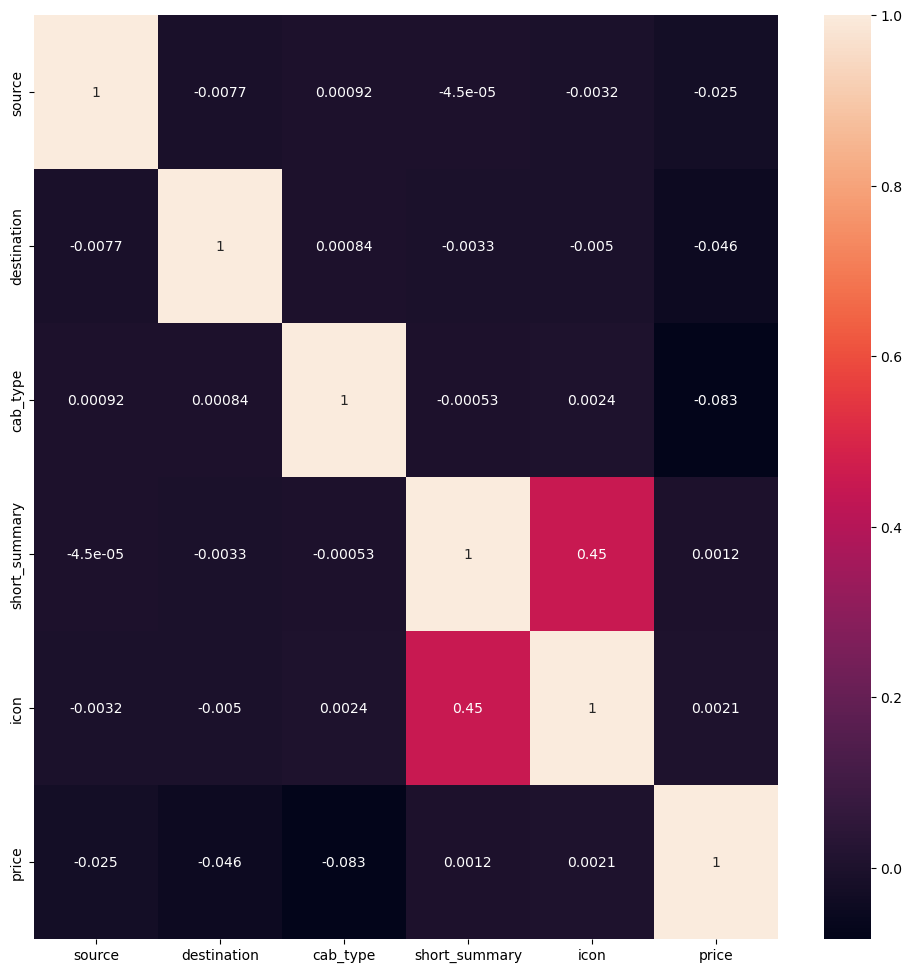

In [85]:
plt.figure(figsize=(12,12))
sns.heatmap(df_cat_encode.corr(),annot=True)

## Menghapus kolom yang dianggap tidak memiliki korelasi yang tinggi

In [86]:
new_df = new_df.drop(['source','destination','icon'],axis=1)
new_df.head()

,cab_type,name,price,distance,surge_multiplier,short_summary,visibility.1
0,Lyft,Shared,5.0,0.44,1.0,Mostly Cloudy,10.000
1,Lyft,Lux,11.0,0.44,1.0,Rain,4.786
2,Lyft,Lyft,7.0,0.44,1.0,Clear,10.000
3,Lyft,Lux Black XL,26.0,0.44,1.0,Clear,10.000
4,Lyft,Lyft XL,9.0,0.44,1.0,Partly Cloudy,10.000


In [87]:
df_name = pd.get_dummies(new_df['name'])

## Drop kolom dan menggabungkan kolom

In [88]:
new_df = pd.concat([new_df.drop(['name', 'short_summary', 'cab_type'], axis=1), df_cat_encode[['cab_type']], df_name], axis=1)

## Melihat ukuran dari Dataframe

In [89]:
new_df.shape

(637976, 17)

## Menampilkan ukuran dari dataframe

In [90]:
new_df.head()

,price,distance,surge_multiplier,visibility.1,cab_type,Black,Black SUV,Lux,Lux Black,Lux Black XL,Lyft,Lyft XL,Shared,UberPool,UberX,UberXL,WAV
0,5.0,0.44,1.0,10.000,0,0,0,0,0,0,0,0,1,0,0,0,0
1,11.0,0.44,1.0,4.786,0,0,0,1,0,0,0,0,0,0,0,0,0
2,7.0,0.44,1.0,10.000,0,0,0,0,0,0,1,0,0,0,0,0,0
3,26.0,0.44,1.0,10.000,0,0,0,0,0,1,0,0,0,0,0,0,0
4,9.0,0.44,1.0,10.000,0,0,0,0,0,0,0,1,0,0,0,0,0


## Menampilkan info umum dari dataframe

In [91]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637976 entries, 0 to 693070
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   price             637976 non-null  float64
 1   distance          637976 non-null  float64
 2   surge_multiplier  637976 non-null  float64
 3   visibility.1      637976 non-null  float64
 4   cab_type          637976 non-null  int32  
 5   Black             637976 non-null  uint8  
 6   Black SUV         637976 non-null  uint8  
 7   Lux               637976 non-null  uint8  
 8   Lux Black         637976 non-null  uint8  
 9   Lux Black XL      637976 non-null  uint8  
 10  Lyft              637976 non-null  uint8  
 11  Lyft XL           637976 non-null  uint8  
 12  Shared            637976 non-null  uint8  
 13  UberPool          637976 non-null  uint8  
 14  UberX             637976 non-null  uint8  
 15  UberXL            637976 non-null  uint8  
 16  WAV               63

# **Pendefinisian Model/Modelling**

Membagi data training dan testing dengan rasio 80:20

In [92]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

In [93]:
x = new_df.drop('price', axis =1)
y = new_df['price']

# **Training Model**

In [94]:
model = LinearRegression()
model.fit(x, y)
model = LinearRegression().fit(x, y)

In [95]:
r2_base = model.score(x, y)
print('coefficient of determination:', r2_base)

coefficient of determination: 0.9272719234011509


### Melihat nilai Intercept

In [96]:
print('intercept:', model.intercept_)

intercept: -374246784129.9976


### Melihat nilai Slope

In [97]:
print('slope:', model.coef_)

slope: [ 2.79466540e+00  1.83269487e+01  2.24910486e-04  1.45127382e+12
 -1.07702704e+12 -1.07702704e+12  3.74246784e+11  3.74246784e+11
  3.74246784e+11  3.74246784e+11  3.74246784e+11  3.74246784e+11
 -1.07702704e+12 -1.07702704e+12 -1.07702704e+12 -1.07702704e+12]


# **Pre Prosessing**
### Menampilkan Dataframe

In [98]:
new_df.head()

,price,distance,surge_multiplier,visibility.1,cab_type,Black,Black SUV,Lux,Lux Black,Lux Black XL,Lyft,Lyft XL,Shared,UberPool,UberX,UberXL,WAV
0,5.0,0.44,1.0,10.000,0,0,0,0,0,0,0,0,1,0,0,0,0
1,11.0,0.44,1.0,4.786,0,0,0,1,0,0,0,0,0,0,0,0,0
2,7.0,0.44,1.0,10.000,0,0,0,0,0,0,1,0,0,0,0,0,0
3,26.0,0.44,1.0,10.000,0,0,0,0,0,1,0,0,0,0,0,0,0
4,9.0,0.44,1.0,10.000,0,0,0,0,0,0,0,1,0,0,0,0,0


### Import Library

In [99]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

### Scaling

In [101]:
scaled = scaler.fit_transform(new_df)
print(scaled)

[[0.02631579 0.05357143 0.         ... 0.         0.         0.        ]
 [0.08947368 0.05357143 0.         ... 0.         0.         0.        ]
 [0.04736842 0.05357143 0.         ... 0.         0.         0.        ]
 ...
 [0.07368421 0.125      0.         ... 1.         0.         0.        ]
 [0.25789474 0.125      0.         ... 0.         0.         0.        ]
 [0.07894737 0.125      0.         ... 0.         0.         0.        ]]


### Membuat Data Frame Baru

In [102]:
df_scaled = pd.DataFrame({"price":scaled[:,0],"distance":scaled[:,1],
                         "surge_multiplier":scaled[:,2],"visibility.1":scaled[:,3],
                         "cab_type":scaled[:,4], "Black":scaled[:,5],"Black SUV":scaled[:,6],
                         "Lux":scaled[:,7], "Lux Black":scaled[:,8], "Lux Black XL":scaled[:,9],
                         "Lyft":scaled[:,10], "Lyft XL":scaled[:,11], "Shared":scaled[:,12],
                         "UberPool":scaled[:,13], "UberX":scaled[:,14],
                         "UberXL":scaled[:,15],"WAV":scaled[:,16]})

In [103]:
df_scaled.head()

,price,distance,surge_multiplier,visibility.1,cab_type,Black,Black SUV,Lux,Lux Black,Lux Black XL,Lyft,Lyft XL,Shared,UberPool,UberX,UberXL,WAV
0,0.026316,0.053571,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.089474,0.053571,0.0,0.438328,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.047368,0.053571,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.247368,0.053571,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.068421,0.053571,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


### Melihat Ukuran Dataframe

In [104]:
df_scaled.shape

(637976, 17)

### Menghitung nilai Kuartil 1 dan 3, serta menghitung rentang interquartile

In [106]:
Qp12 = df_scaled['price'].quantile(0.25)
Qp32 = df_scaled['price'].quantile(0.75)
IQRp = Qp32-Qp12
print(Qp12)
print(Qp32)
print(IQRp)

0.06842105263157895
0.21052631578947367
0.14210526315789473


### Melihat Dataframe yang lebih besar dari nilai batas

In [107]:
df_scaled[df_scaled['price']>(Qp32+(1.5*IQRp))]

,price,distance,surge_multiplier,visibility.1,cab_type,Black,Black SUV,Lux,Lux Black,Lux Black XL,Lyft,Lyft XL,Shared,UberPool,UberX,UberXL,WAV
645,0.526316,0.411990,0.500,0.989120,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
646,0.684211,0.411990,0.500,0.981364,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
706,0.452632,0.604592,0.000,0.995906,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1005,0.452632,0.547194,0.000,0.141441,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1210,0.452632,0.677296,0.000,0.957772,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637394,0.468421,0.706633,0.000,0.979317,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
637637,0.526316,0.581633,0.125,0.961327,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
637813,0.473684,0.688776,0.000,0.080039,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
637878,0.510526,0.936224,0.000,0.988043,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Melihat Dataframe yang lebih kecil dari nilai batas

In [108]:
df_scaled[df_scaled['price']<(Qp12-(1.5*IQRp))]

,price,distance,surge_multiplier,visibility.1,cab_type,Black,Black SUV,Lux,Lux Black,Lux Black XL,Lyft,Lyft XL,Shared,UberPool,UberX,UberXL,WAV


### Melihat ukuran Dataframe sebelum di remove

In [109]:
print('Size before removing :',df_scaled.shape)

Size before removing : (637976, 17)


### Remove dataframe dan melihat ukurannya

In [110]:
df_scaled= df_scaled[~((df_scaled['price']>(Qp32+(1.5*IQRp))))]
print('Size after removing :',df_scaled.shape)

Size after removing : (632387, 17)


### Melihat 5 data teratas pada dataframe

In [111]:
df_scaled.head()

,price,distance,surge_multiplier,visibility.1,cab_type,Black,Black SUV,Lux,Lux Black,Lux Black XL,Lyft,Lyft XL,Shared,UberPool,UberX,UberXL,WAV
0,0.026316,0.053571,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.089474,0.053571,0.0,0.438328,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.047368,0.053571,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.247368,0.053571,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.068421,0.053571,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


### Melihat Statistik Umum dari price dan distance

In [112]:
data = df_scaled[['price','distance']]
data.describe()

,price,distance
count,632387.000000,632387.000000
mean,0.144688,0.274516
std,0.092311,0.142408
min,0.000000,0.000000
25%,0.068421,0.159439
50%,0.115789,0.270408
75%,0.210526,0.367347
max,0.421053,1.000000


#  **Modelling**

In [113]:
X = df_scaled.drop('price', axis=1)
y = df_scaled['price']

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [115]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score, confusion_matrix, classification_report

In [116]:
# training model 
linreg = LinearRegression()

In [117]:
# fit data training
model = linreg.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [118]:
print('Nilai koefisien regresi : \n', model.coef_)
print('Nilai intercept : \n', model.intercept_)

Nilai koefisien regresi : 
 [ 2.20478677e-01  2.87720146e-01 -1.25048053e-05 -3.55424135e+10
 -3.64257931e+10 -3.64257931e+10 -7.19682066e+10 -7.19682066e+10
 -7.19682066e+10 -7.19682066e+10 -7.19682066e+10 -7.19682066e+10
 -3.64257931e+10 -3.64257931e+10 -3.64257931e+10 -3.64257931e+10]
Nilai intercept : 
 71968206554.90279


# **Evaluasi Model**

In [119]:
# evaluation model
r2_score(y_test, y_pred)

0.9334502037015049

In [120]:
# mengecek nilai R2 pada data training
y_train_pred = linreg.predict(X_train)
r2_score(y_train, y_train_pred)

0.9333912217789

In [121]:
mse = mean_squared_error(y_test, y_pred, squared=False)
print(mse)

0.023809947426186102


In [122]:
mae = mean_absolute_error(y_test, y_pred)
print(mae)

0.01762890711269221


In [123]:
# membuat array dari nilai y_test
y_test_vis = np.array(y_test)
y_test_vis

array([0.17894737, 0.05789474, 0.08421053, ..., 0.06842105, 0.17894737,
       0.02631579])

In [124]:
y_pred

array([0.16337585, 0.05142212, 0.05445862, ..., 0.05574036, 0.16584778,
       0.10440063])

In [125]:
# membuat dataframe nilai y_test dan y_prabsed
resid = pd.DataFrame(y_pred, y_test_vis)
resid = resid.reset_index()
resid = resid.rename(columns={"index":"actual_val",
                             0:"predict_val"})

In [126]:
# menambahkan kolom dari selisih antara nilai y_test dan y_pred
resid["residual"] = resid["actual_val"] - resid["predict_val"]
resid

,actual_val,predict_val,residual
0,0.178947,0.163376,0.015572
1,0.057895,0.051422,0.006473
2,0.084211,0.054459,0.029752
3,0.052632,0.036880,0.015751
4,0.263158,0.273651,-0.010493
...,...,...,...
126473,0.210526,0.226120,-0.015594
126474,0.284211,0.298355,-0.014145
126475,0.068421,0.055740,0.012681
126476,0.178947,0.165848,0.013100


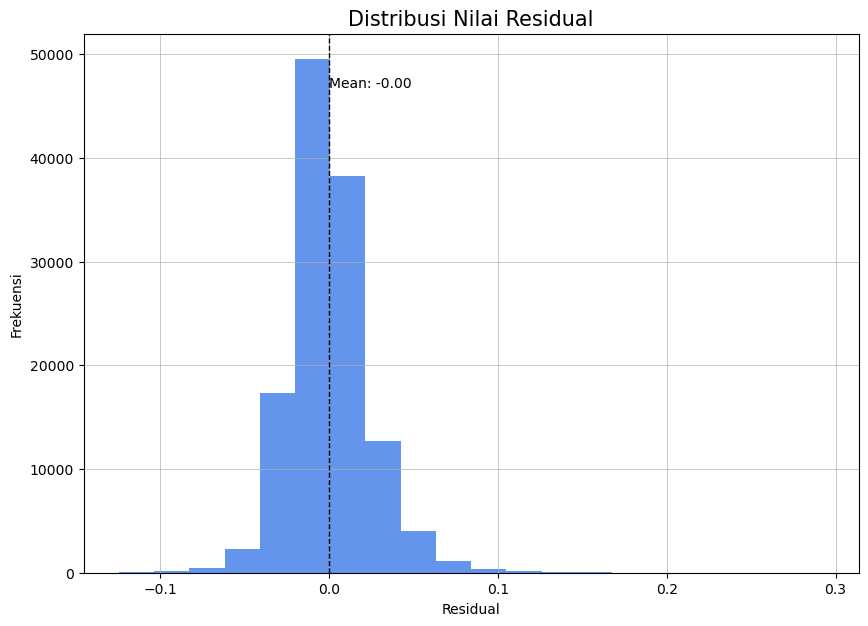

In [127]:
# plotting
dist_resid = resid["residual"]
dist_resid.plot(kind="hist", figsize=(10,7), bins=20, color="#6495ED")
plt.title("Distribusi Nilai Residual", fontsize=15)
plt.xlabel("Residual", fontsize=10)
plt.ylabel("Frekuensi", fontsize=10)
plt.grid(linewidth=0.5)
plt.axvline(dist_resid.mean(), color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(dist_resid.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(dist_resid.mean()))
plt.show()

In [127]:
resid['residual'].skew()

0.8831071802677425

# **Model Inference**

In [ ]:
distance = float(input("Distance:"))
surge = float(input("Surge Multiplier:"))
visibility = float(input("visibility.1:"))
ride = input("Ride Types:")
types = input("Uber/Lyft?")

val = [distance, surge, visibility]

cab_types = {"Uber":0,
            "Lyft":1}

for i in range(0,2):
    if cab_types[types]==i:
        val.append(1.0)
    else:
        val.append(0.0)
        
ride_types = {"UberX" : 0,
                 "UberXL" : 1,
                 "Black" : 2,
                 "BlackSUV": 3,
                 "WAV" : 4,
                 "UberPool" : 5,
                 "Shared" : 6,
                 "Lyft" : 7,
                 "LyftXL" : 8,
                 "Lux": 9,
                 "LuxBlack" : 10,
                 "LuxBlackXL" : 11}

for i in range(0,11):
    if ride_types[ride]==i:
        val.append(1.0)
    else:
        val.append(0.0)

print(val)

predict = model.predict([val])

print("Here's your estimated price:", predict)

# **Hypothesis Testing**

In [142]:
import statsmodels.api as sm

Pertanyaan : apakah perjalanan rata-rata penggunaan uber berbeda dengan lyft?

## Hipotesis

H0: μ1=μ2 Rata-rata perjalanan dari penggunaan uber sama dengan perjalanan dengan lyft

H1: μ1≠μ2 Rata-rata perjalanan dari penggunaan uber berbeda dengan perjalanan dengan lyft

In [131]:
new_df

,price,distance,surge_multiplier,visibility.1,cab_type,Black,Black SUV,Lux,Lux Black,Lux Black XL,Lyft,Lyft XL,Shared,UberPool,UberX,UberXL,WAV
0,5.0,0.44,1.0,10.000,0,0,0,0,0,0,0,0,1,0,0,0,0
1,11.0,0.44,1.0,4.786,0,0,0,1,0,0,0,0,0,0,0,0,0
2,7.0,0.44,1.0,10.000,0,0,0,0,0,0,1,0,0,0,0,0,0
3,26.0,0.44,1.0,10.000,0,0,0,0,0,1,0,0,0,0,0,0,0
4,9.0,0.44,1.0,10.000,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693065,9.5,1.00,1.0,9.785,1,0,0,0,0,0,0,0,0,0,0,0,1
693066,13.0,1.00,1.0,9.785,1,0,0,0,0,0,0,0,0,0,0,1,0
693067,9.5,1.00,1.0,9.785,1,0,0,0,0,0,0,0,0,0,1,0,0
693069,27.0,1.00,1.0,9.785,1,0,1,0,0,0,0,0,0,0,0,0,0


In [136]:
lyft = new_df[new_df["Lyft"] == 0]
uber = new_df[new_df["Lyft"] == 1]

In [138]:
n1 = len(lyft)
mu1 = lyft["cab_type"].mean()
sd1 = lyft["cab_type"].std()

(n1, mu1, sd1)

(586741, 0.5633967968831222, 0.49596498402284056)

In [140]:
n2 = len(lyft)
mu2 = uber["cab_type"].mean()
sd2 = uber["cab_type"].std()

(n2, mu2, sd2)

(586741, 0.0, 0.0)

In [143]:
sm.stats.ztest(lyft["cab_type"].dropna(), uber["cab_type"].dropna(),alternative='two-sided')

(257.12625089945004, 0.0)

Karena p-value (0) sangat kecil, sehingga dapat H0 ditolak. Dan hasilnya adalah Rata-rata perjalanan dari penggunaan uber berbeda dengan perjalanan dengan lyft.

# **Kesimpulan**
Dari analisis yang telah dikerjakan menggunakan model Linear Regression dapat disimpulkan  :
- Project ini berisikan tentang penerapan LinearRegression pada dataset Uber & Lyft dari hasil analisis maka dapat diketahui bahwa perjalanan yang ditempuh menggunakan uber lebih tinggi dibandingkan menggunakan Lyft
- Model regresi R² sebesar 0,9334 dalam presentase 93.34% jadi variabel independenya cukup baik dalam memprediksi variasi nilai dependentnya. Selain itu nilai RMSE dan MAE cenderung kecil yaitu sebesar 0.0238 dan 0.0176.
- Dengan begitu Residual model dari regresi berdistribusi normal, yang artinya memenuhi salah satu asumsi klasik regresi linear.